# Problem
A worldwide e-commerce site has localized versions of the site in Spanish. Managers noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. After talking to the international team in charge of Spain And Latin America(LatAm) about it, the Spain and LatAm country manager suggested that one reason could be translation.

They want to know whether implementing standardized Spanish translation versus localized translation -i.e, Mexican Spanish for Mexico- has any effect on sales

**Additional Requirement**

It is estimated that about 80,000 shoppers from Spanish-speaking countries visit the website daily, and the company would want enough time to negotiate contracts before the holiday season if the result turns out favorable towards local translations. Therefore, the experiment will run for 5 days to allow for a sizeable sample, which is from the 30th of November to December 4th, giving enough time for the company to act on findings before the holidays.

# Proposed solution
They agreed to try a test where each country would have its one translation written by a local, replicating what happened with Spanish users. As for users from Spain, they would have no change since their translation is already localized to Spanish.

## Hypothesis
Including a localized Spanish translation for each country's dialect will increase **conversions** for Spanish-speaking countries other than Spain.

## Metric
We will be using conversion as the metric to test our hypothesis. Conversion is defined as the number of customers who sign up for the company's website, given they have been exposed to the translation.

## Experiment Plan
We will conduct a randomized design, which is done by randomly dividing visitors into equal groups for each country, and having one group (control group) exposed to the original Spanish translation, and the other (treatment group) exposed to a more localized Spanish translation.

We want to measure whether having a localized translation results in a significant difference in conversions of the two groups.

# Data Import and Inspection

In [ ]:
# Print every output from a specific cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change to the current location (ref: https://webapps.stackexchange.com/questions/170886/copy-the-path-of-a-file-in-google-drive)
import os
os.chdir('/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset')
!pwd

/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, zscore
import scipy.stats as stats

%matplotlib inline


In [ ]:
test_file_name = "test_table.csv"
user_file_name = 'user_table.csv'

test_df = pd.read_csv(test_file_name)
user_df = pd.read_csv(user_file_name)

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [ ]:
test_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [ ]:
user_df.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [ ]:
test_data = pd.merge(test_df, user_df, on = 'user_id', how = 'left')
test_data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 41.5+ MB


In [ ]:
test_data.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [ ]:
test_data[test_data['sex'].isnull()].head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
819,657841,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,NaN,NaN,NaN
1696,859340,2015-12-04,Direct,Mobile,EN,NaN,Android_App,0,0,NaN,NaN,NaN
1934,716487,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,0,NaN,NaN,NaN
2409,87209,2015-12-01,Direct,Web,ES,NaN,Chrome,0,0,NaN,NaN,NaN
2721,771642,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0,NaN,NaN,NaN


In [ ]:
test_data[test_data['country'].isnull()]['age'].value_counts()
test_data[test_data['country'].isnull()]['sex'].value_counts()

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

In [ ]:
missing_rate = test_data[test_data['country'].isnull()].shape[0]/test_data.shape[0]
missing_rate

0.0010014978348675662

In [ ]:
test_data[test_data['country'].isnull()]['test'].value_counts(normalize = True)

test
0    0.539648
1    0.460352
Name: proportion, dtype: float64

In [ ]:
test_data['test'].value_counts(normalize = True)

test
0    0.523554
1    0.476446
Name: proportion, dtype: float64

In [ ]:
test_data[test_data['country'].isnull()]['conversion'].value_counts(normalize = True)

conversion
0    0.931718
1    0.068282
Name: proportion, dtype: float64

In [ ]:
test_data['conversion'].value_counts(normalize = True)

conversion
0    0.950421
1    0.049579
Name: proportion, dtype: float64

The above analysis shows that
* The missing rate is 0.1%, which is not high
* When country is missing, age and sex are also missing.
* The missing rate is similiar between the test and control groups.
* The conversion rate of the missing data is ~ 2% higher than that of the non-missing data.

It should be safe to delete the missing cases from the measurement.


In [ ]:
test_data_clean = test_data[~test_data['country'].isnull()]

In [ ]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452867 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           452867 non-null  int64  
 1   date              452867 non-null  object 
 2   source            452867 non-null  object 
 3   device            452867 non-null  object 
 4   browser_language  452867 non-null  object 
 5   ads_channel       181693 non-null  object 
 6   browser           452867 non-null  object 
 7   conversion        452867 non-null  int64  
 8   test              452867 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 44.9+ MB


# A/B Test Measurement

Below we conduct A/B test measurement for each country.

## Check Treatment-Control Balance

In [ ]:
test_data_clean.groupby(['country'])['test'].value_counts(normalize = True)

country      test
Argentina    1       0.799799
             0       0.200201
Bolivia      1       0.501079
             0       0.498921
Chile        1       0.500785
             0       0.499215
Colombia     0       0.501073
             1       0.498927
Costa Rica   0       0.501036
             1       0.498964
Ecuador      0       0.505568
             1       0.494432
El Salvador  0       0.502508
             1       0.497492
Guatemala    0       0.503934
             1       0.496066
Honduras     0       0.508987
             1       0.491013
Mexico       1       0.500257
             0       0.499743
Nicaragua    0       0.508553
             1       0.491447
Panama       1       0.502404
             0       0.497596
Paraguay     1       0.503199
             0       0.496801
Peru         0       0.501069
             1       0.498931
Spain        0       1.000000
Uruguay      1       0.899613
             0       0.100387
Venezuela    0       0.503806
             1       0

Findings
* Spain is not in test. So all the data in Spain are in the Control group
* The treatment-control balanceness hold for all the countries except for Argentina and Uruguay. Since the experiment assignment should be randomlized, there must be data entry error of Argentina and Uruguay. Maybe the missing data found above belongs to either of the two countries, but we don't know the groundtruth. So, we will exclude these two countries from the measurement and leave for further investigations.

In [ ]:
test_data_measure = test_data_clean[~test_data_clean['country'].isin(['Spain', 'Argentina', 'Uruguay'])]

In [ ]:
test_data_measure['country'].value_counts()

country
Mexico         128484
Colombia        54060
Peru            33666
Venezuela       32054
Chile           19737
Ecuador         15895
Guatemala       15125
Bolivia         11124
Honduras         8568
El Salvador      8175
Paraguay         7347
Nicaragua        6723
Costa Rica       5309
Panama           3951
Name: count, dtype: int64

## Conduct Measurement
In this case, we are testing proportions. And we are especially interested to see whether conversion rate will improve after localized translation. Thus, we will conduct a one-sided test on proportions (conversion rate) and our hypothesis is H0: p1 = p2 v.s. H1: p1 < p2.

Since our sample size is large enough to satisfy the Central Limit Theorm, we will conduct a one-sided z-test. Our test statistics is z = (p1_hat - p2_hat)/sqrt(sample_variance). If we are sure the sample variance are equal, we can compute the combined sample variance: p'(1-p')/(n1+n2), where p' = (x1+x2)/(n1+n2). Otherwise, sample_variance = s1^2 + s2^2 = p1(1-p1)/n1 + p2(1-p2)/n2.

In [ ]:
# Manually calculate p-values

class Ztest:
  def __init__(self, equal_var = True, alternative = 'two-sided'):
    self.equal_var = equal_var
    self.alternative = alternative

  def z_score(self, a, b):
    p1 = np.mean(a)
    p2 = np.mean(b)
    n1 = len(a)
    n2 = len(b)

    if self.equal_var:
      p = np.sum(a+b)/(n1+n2)
      sample_var = p*(1-p)/(n1+n2)
    else:
      sample_var = p1*(1-p1)/n1 + p2*(1-p2)/n2

    zs = (np.mean(a) - np.mean(b))/np.sqrt(sample_var)

    return zs

  def p_val(self, a, b):
    if self.alternative == 'two-sided':
      p = 2 * stats.norm.cdf(-np.abs(self.z_score(a, b)))
    elif self.alternative == 'greater':
      p = 1 - stats.norm.cdf(self.z_score(a, b))
    elif self.alternative == 'less':
      p = stats.norm.cdf(self.z_score(a, b))

    return p

In [ ]:
countries = []
p_vals = []

for country, df in test_data_measure.groupby('country'):
  res  = Ztest(equal_var = False, alternative = 'greater')
  countries.append(country)
  p_vals.append(np.round(res.p_val(df[df['test'] == 1]['conversion'], df[df['test'] == 0]['conversion']), 2))

measure_res1 = pd.DataFrame({'country':countries, 'p_value': p_vals})
measure_res1

,country,p_value
0,Bolivia,0.64
1,Chile,0.15
2,Colombia,0.79
3,Costa Rica,0.34
4,Ecuador,0.52
5,El Salvador,0.88
6,Guatemala,0.71
7,Honduras,0.76
8,Mexico,0.08
9,Nicaragua,0.39


The manually computed results match the results from the stats package.

## Findings
* Under 5% significance level, none of the countries in test yield significant lift in conversion rate with local translations.
* This could be due to two reasons:
  * The local translation is ineffective in boosting conversion rate
  * The sample size is not large enough to generate significant result

Next, we will conduct a power study on the sample size to see if we have enough sample to draw the conclusion.

# Power/Sample Size Analysis

Suppose we would like to be able to detect at least 100*delta% lift in conversion rate with 5% significance level and 80% power (detect lift when there is a lift with 98% of time). Assuming equal sample size for treatment and control group, the the require sample size for each group is [p1(1-p1) + p2(1-p2)]/[delta/(z_alpha + z_beta)]^2. (derivation is omitted here).

**TO-DO**: draw power curve (with confidence band) as a function of MDE and sample size thru simulation study.

In [ ]:
def req_sample_size(p1_hat, p2_hat, delta, alpha, power):
  z_alpha = -stats.norm.ppf(alpha)
  z_beta = -stats.norm.ppf(1-power)

  return (p1_hat*(1-p1_hat) + p2_hat*(1-p2_hat))/(delta/(z_alpha + z_beta))**2

In [ ]:
alpha = 0.05
power = 0.8
delta = 0.01

countries = []
curr_ss = []
req_ss = []
meet_req_ss = []

for country, df in test_data_measure.groupby('country'):
  p1_hat = np.mean(df[df['test'] == 0]['conversion'])
  p2_hat = np.mean(df[df['test'] == 1]['conversion'])
  n1 = df[df['test'] == 0].shape[0]
  n2 = df[df['test'] == 1].shape[0]

  sp  = np.ceil(req_sample_size(p1_hat, p2_hat, delta, alpha, power))
  curr_ss.append(np.ceil((n1+n2)/2))
  req_ss.append(sp)
  countries.append(country)
  meet_req_ss.append(curr_ss[-1] >= sp)

sample_size_res = pd.DataFrame({'country':countries, 'current_sample_size': curr_ss, 'required_sample_size':req_ss, 'meet_required_sample_size':meet_req_ss})
sample_size_res

,country,current_sample_size,required_sample_size,meet_required_sample_size
0,Bolivia,5562.0,5722.0,False
1,Chile,9869.0,5840.0,True
2,Colombia,27030.0,6022.0,True
3,Costa Rica,2655.0,6261.0,False
4,Ecuador,7948.0,5770.0,True
5,El Salvador,4088.0,5956.0,False
6,Guatemala,7563.0,5834.0,True
7,Honduras,4284.0,5787.0,False
8,Mexico,64242.0,5912.0,True
9,Nicaragua,3362.0,6252.0,False


In [ ]:
sample_size_res[sample_size_res['meet_required_sample_size'] == True]['country']

1         Chile
2      Colombia
4       Ecuador
6     Guatemala
8        Mexico
12         Peru
13    Venezuela
Name: country, dtype: object

Results showed that the required sample sizes for at least 1% lift in conversion rate are met for **Chile, Colombia, Ecuador, Guatemala, Mexico, Peru, and Venezuela**. Therefore, for these countries, the local translation testing can be concluded **ineffective**. For the rest of the countries, we need more samples to conclude.

If we are interested in detecting lift size other than 1%, we can tune the delta parameter above to see whether the required sample size is met or not.



# Future Work
* Based on the business interest on the minimum detectable effect (delta), conclude the countries meet the required sample size.
* For countries don't meet the required sample size, decide whether we want to continue running the test to collect more samples.
* Conduct ad-hoc analysis to see if we have opportunities in sub-groups by source, device, ads_channel, browser, sex, and age. But note that the experiment on any sub-group is not completely randomized. Thus, typical z-test needs to be adjusted accordingly. For example, we can conduct the measurement based on DID regression model.
* Our test data also has time attribute. So, we can conduct ad-hoc analysis on time to investigate whether seasonality exist, which might impact the test result.



<Axes: xlabel='browser', ylabel='count'>

Text(0.5, 1.0, 'Count Plot of Browser')

<Axes: xlabel='browser', ylabel='conversion'>

Text(0.5, 1.0, 'Mean Conversion Rate per Browser')

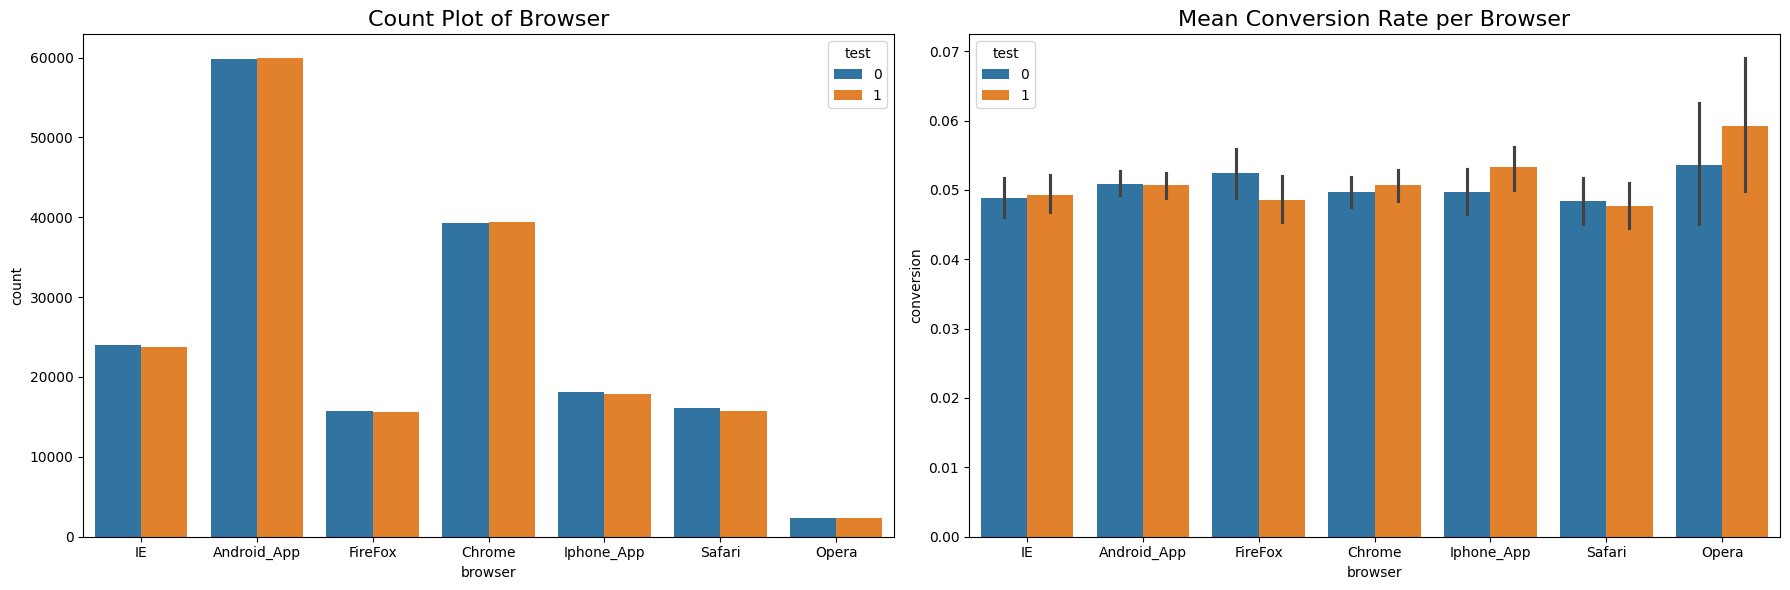

In [ ]:
# e.g. Graph below shows treatment v.s. control in terms of mean conversion rate per Browser
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser', hue='test', data=test_data_measure, ax=ax[0])
ax[0].set_title('Count Plot of Browser', fontsize=16)

sns.barplot(x='browser', y='conversion', hue='test', data=test_data_measure, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Browser', fontsize=16)
plt.tight_layout()
plt.show()

<Axes: xlabel='date', ylabel='conversion'>

Text(0.5, 1.0, 'Time Series of Conversion Rate by Test Group for Mexico')

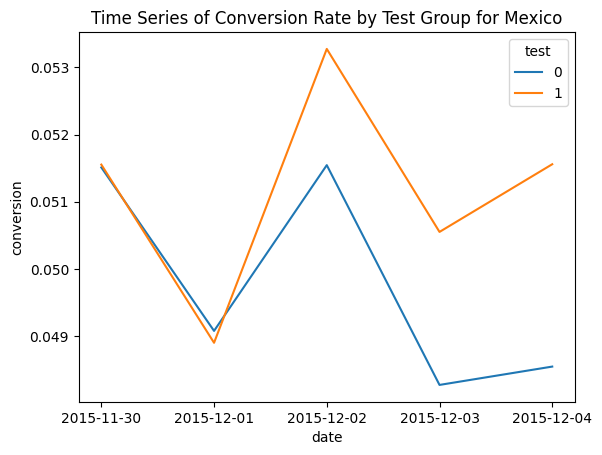

In [ ]:
# e.g. Investigate time effect
c = 'Mexico'
tm_agg = test_data_measure[test_data_measure['country'] == c][['date', 'test', 'conversion']].groupby(['date', 'test']).mean()
sns.lineplot(x = 'date', y = 'conversion', hue = 'test', data = tm_agg)
plt.title(f'Time Series of Conversion Rate by Test Group for {c}')

<Axes: xlabel='date', ylabel='conversion'>

Text(0.5, 1.0, 'Time Series of Conversion Rate by Test Group for Colombia')

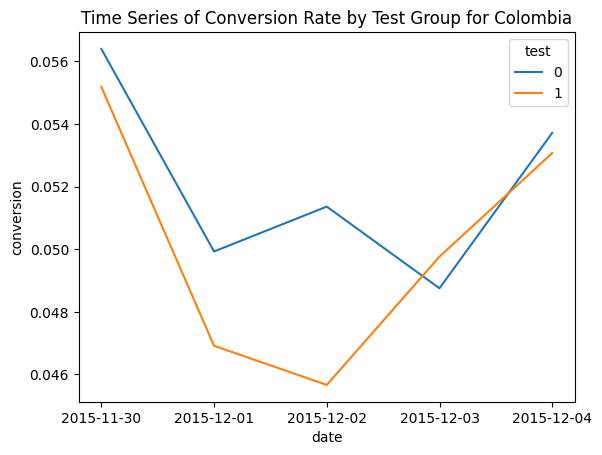

In [ ]:
c = 'Colombia'
tm_agg = test_data_measure[test_data_measure['country'] == c][['date', 'test', 'conversion']].groupby(['date', 'test']).mean()
sns.lineplot(x = 'date', y = 'conversion', hue = 'test', data = tm_agg)
plt.title(f'Time Series of Conversion Rate by Test Group for {c}')